In [1]:
# Scroll to the bottom for answers to the assignment!
#importing graphlab

import graphlab




In [2]:
sales=graphlab.SFrame("home_data.gl")
sales.num_rows()

This non-commercial license of GraphLab Create for academic use is assigned to srini.gln@gmail.com and will expire on October 28, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\SRINIVAS\AppData\Local\Temp\graphlab_server_1510129442.log.0


21613

In [3]:
graphlab.canvas.set_target('ipynb')
sales.show(view='Scatter Plot',x='sqft_living',y='price')

In [5]:
# Splitting total data into 80 % training data and 20% test data
train_data,test_data=sales.random_split(0.8,seed=0)

In [6]:
#Building Regression model
sqft_model=graphlab.linear_regression.create(train_data,target='price',features=['sqft_living'])



PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16515

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.018294     | 4350259.833886     | 2723294.657502       | 262687.853555 | 267760.859007   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [7]:
#Evaluating the simple regression model we built
print(test_data['price'].mean())


543054.042563


In [8]:
print(sqft_model.evaluate(test_data))

{'max_error': 4144070.3710765457, 'rmse': 255184.80433762295}


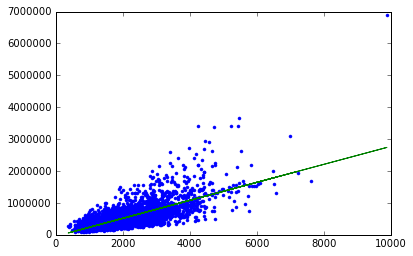

In [9]:
#visualize how our prdictions look like by plotting the predicted prices for test data 
#and actual test data
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_data['sqft_living'],test_data['price'],'.',
         test_data['sqft_living'],sqft_model.predict(test_data),'-')

To check the regression coefficients of the model 

In [10]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-46633.4325648,5039.3556215
sqft_living,None,281.856730181,2.21602165758


In [11]:
#to explore other features in data and visalize the data
my_features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
sales[my_features].show()

In [12]:
#To see how the price varies with locality using zipcode
sales.show(view='BoxWhisker Plot',x='zipcode',y='price')

In [13]:
#create a new regression model with updated features found in list 'my_features'
my_features_model=graphlab.linear_regression.create(train_data,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16477

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.031092     | 3749197.889643     | 1587654.190130       | 182647.752840 | 169386.181868   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [14]:
# comparing  error with both previous model with one feature sqft_modl 
#and many featurs in my features model
print(sqft_model.evaluate(test_data))
print(my_features_model.evaluate(test_data))

{'max_error': 4144070.3710765457, 'rmse': 255184.80433762295}
{'max_error': 3462383.625309717, 'rmse': 179402.51206363458}


In [15]:
#apply the two models to predict the prices of 3 houses 
house1=sales[sales['id']=='5309101200']


<img src='house-5309101200.jpg'>

In [16]:
#to see how good our model prdict our house1 price
print('the original price of house1 is',house1['price'])
print('\nmodel using 1 feature predicts house1...\t',sqft_model.predict(house1))
print('\nmodel using multiple feature predicts house1 ...\t',my_features_model.predict(house1))


('the original price of house1 is', dtype: int
Rows: ?
[620000L, ... ])
('\nmodel using 1 feature predicts house1...\t', dtype: float
Rows: 1
[629822.719869191])
('\nmodel using multiple feature predicts house1 ...\t', dtype: float
Rows: 1
[721283.9901464282])


In [17]:
#house 2
house2=sales[sales['id']=='1925069082']
#to see how good our model prdict our house2 price
print('the original price of house2 is')
print(house2['price'])
print('\nmodel using 1 feature predicts house2...')
print(sqft_model.predict(house2))
print('\nmodel using multiple feature predicts house2 ...\t')
print(my_features_model.predict(house2))


the original price of house2 is
[2200000L, ... ]

model using 1 feature predicts house2...
[1261181.7954742042]

model using multiple feature predicts house2 ...	
[1458231.1168149603]


In [18]:
#bill gates house
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [19]:
#bill gates house using both simple model with 1 f and multi feature model
print('Multi feature model predicts bill gates house...')
print(my_features_model.predict(graphlab.SFrame(bill_gates)))

Multi feature model predicts bill gates house...
[13904129.075488215]


In [20]:
print('1 feature model predicts bill gates house')
print(sqft_model.predict(graphlab.SFrame(bill_gates)))

1 feature model predicts bill gates house
[14046203.076475723]


# Assignment

# 1. Selection and summary statistics:
In the notebook we covered in the module, we discovered which neighborhood (zip code) of Seattle had the highest average house sale price. Now, take the sales data, select only the houses with this zip code, and compute the average price. Save this result to answer the quiz at the end.

# 2. Filtering Data
One of the key features we used in our model was the number of square feet of living space (‘sqft_living’) in the house. For this part, we are going to use the idea of filtering (selecting) data.

In particular, we are going to use logical filters to select rows of an SFrame. You can find more info in the Logical Filter section of this documentation.(https://turi.com/products/create/docs/generated/graphlab.SFrame.html)
Using such filters, first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.

# 3. Building a regression model with several more features: 

In the sample notebook, we built two regression models to predict house prices, one using just ‘sqft_living’ and the other one using a few more features, we called this set



my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
  'zipcode']
  
  
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]
 

# Create a new regression model with advanced features found in list 'advanced_features'

In [22]:
advanced_features = [
'bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode',
'condition','grade', 'waterfront','view','sqft_above','sqft_basement',
'yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']

In [23]:
advanced_model=graphlab.linear_regression.create(train_data,target='price',features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16526

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.040122     | 3459235.696416     | 2350190.843137       | 153529.584122 | 178160.477555   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

# RMSE Error for advanced model and my features model

In [24]:
print(my_features_model.evaluate(test_data))

{'max_error': 3462383.625309717, 'rmse': 179402.51206363458}


In [25]:
print(advanced_model.evaluate(test_data))

{'max_error': 3526902.937665375, 'rmse': 156847.36373149152}


# Number of houses in seattle alone using zipcode 98039


# Question 1:

Selection and summary statistics: We found the zip code with the highest average house price. What is the average house price of that zip code?

In [26]:
import graphlab.aggregate as agg
avg_zp=sales.groupby(key_columns=['zipcode'],operations={'AvgHousePrice':agg.MEAN('price')})
max_zp=avg_zp[avg_zp['AvgHousePrice']==avg_zp['AvgHousePrice'].max()]
print('The highest average price of house is found in zipcode.. ')
print(max_zp['zipcode'])
print('And the that average price is....')
print(max_zp['AvgHousePrice'])

#Method 2

seattle_data=sales[sales['zipcode']=='98039']
#seattle_data.show()
answer1=seattle_data['price'].mean()
print('The mean average price of a house in the seattle by method 2 is ',answer1)

The highest average price of house is found in zipcode.. 
['98039', ... ]
And the that average price is....
[2160606.6000000006, ... ]
('The mean average price of a house in the seattle by method 2 is ', 2160606.5999999996)


# Question 2:
Filtering data: What fraction of the houses have living space between 2000 sq.ft. and 4000 sq.ft.?

In [27]:
filteredHouses=sales[(sales['sqft_living']>2000) & (sales['sqft_living']<4000)]
x=float(filteredHouses.num_rows())
y=float(sales.num_rows())
#print(x,y,x/y,type(x),type(y))

print('The fraction of houses between 2000 sq.ft and 4000 sq.ft is',x/y)

('The fraction of houses between 2000 sq.ft and 4000 sq.ft is', 0.4215518437977143)


# Question 3:

Building a regression model with several more features: What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features?

In [28]:
advanced_features = [
'bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode',
'condition','grade', 'waterfront','view','sqft_above','sqft_basement',
'yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']
#sales[advanced_features].show()

# Difference of RMSE between the advanced model and my features model 


In [29]:
a=my_features_model.evaluate(test_data)
RMSE_myFeatures=a['rmse']
b=advanced_model.evaluate(test_data)
RMSE_advFeatures=b['rmse']
answer3=RMSE_advFeatures-RMSE_myFeatures
print('Difference of RMSE between the advanced model and my features model is',answer3)

('Difference of RMSE between the advanced model and my features model is', -22555.148332143057)


In [30]:
print('Therefore the RMSE of Advanced model is less than 22685$ compared to RMSE of my_features model')

Therefore the RMSE of Advanced model is less than 22685$ compared to RMSE of my_features model


#  Model Visualization

visualizing how our prdictions look like by plotting the predicted prices for test data using 
1 feature model,Multi feature model and advanced feature model with actual test prices of the test data



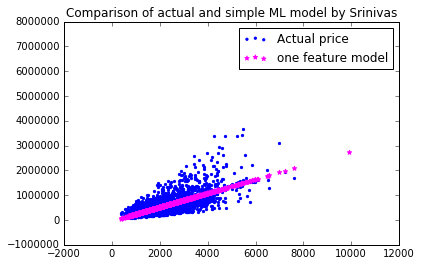

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(test_data['sqft_living'],test_data['price'],label='Actual price',marker='.',color='blue')
plt.scatter(test_data['sqft_living'],sqft_model.predict(test_data),label='one feature model',
            marker='*',color='magenta')

plt.legend()
plt.title('Comparison of actual and simple ML model by Srinivas')
         

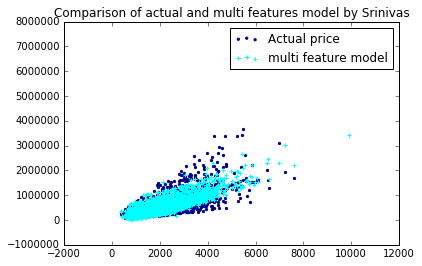

In [57]:
plt.scatter(test_data['sqft_living'],test_data['price'],label='Actual price',marker='.',color='darkblue')
plt.scatter(test_data['sqft_living'],my_features_model.predict(test_data),label='multi feature model',
    marker='+', color='cyan')
plt.legend()
plt.title('Comparison of actual and multi features model by Srinivas')

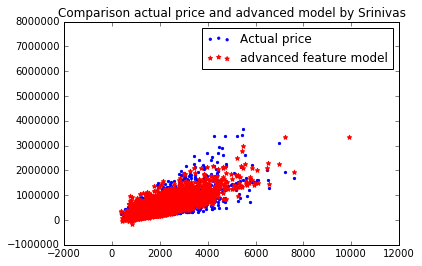

In [58]:
plt.scatter(test_data['sqft_living'],test_data['price'],label='Actual price',marker='.',color='blue')
plt.scatter(test_data['sqft_living'],advanced_model.predict(test_data),label='advanced feature model',
        marker='*',color='red')
plt.legend()
plt.title('Comparison actual price and advanced model by Srinivas')